# Visualization

## Import Required Library

In [1]:
import torch
import numpy as np
import pandas as pd
import torchvision
from torchvision import datasets
from torch.utils.data import DataLoader
from torch.utils.data.dataset import random_split
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.axes_grid import ImageGrid

In [2]:
my_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

In [3]:
data_path = "/home/ritushwar/Nutritional-Assistance/data"
data_tensor = datasets.ImageFolder(
    root=data_path,
    transform=my_transforms,
    target_transform=None
)

In [4]:
classes = data_tensor.classes
print(len(classes))

4571


In [5]:
image_tensor, label = data_tensor[0]
print(image_tensor.shape)
print(image_tensor)
print(label)

torch.Size([3, 224, 224])
tensor([[[0.4314, 0.2863, 0.6431,  ..., 0.0078, 0.0118, 0.0039],
         [0.1843, 0.2588, 0.5608,  ..., 0.0078, 0.0039, 0.0039],
         [0.1608, 0.3922, 0.5961,  ..., 0.0078, 0.0039, 0.0039],
         ...,
         [0.1569, 0.1608, 0.1529,  ..., 0.4039, 0.4196, 0.4314],
         [0.1412, 0.1451, 0.1373,  ..., 0.4157, 0.4275, 0.4314],
         [0.1255, 0.1333, 0.1294,  ..., 0.4196, 0.4353, 0.4314]],

        [[0.4471, 0.3059, 0.6627,  ..., 0.0000, 0.0039, 0.0039],
         [0.2000, 0.2745, 0.5765,  ..., 0.0000, 0.0000, 0.0039],
         [0.1765, 0.4078, 0.6118,  ..., 0.0000, 0.0000, 0.0039],
         ...,
         [0.1137, 0.1176, 0.1098,  ..., 0.4000, 0.4078, 0.4157],
         [0.0980, 0.1020, 0.0941,  ..., 0.4000, 0.4118, 0.4157],
         [0.0824, 0.0902, 0.0863,  ..., 0.4078, 0.4157, 0.4118]],

        [[0.3412, 0.1922, 0.5451,  ..., 0.0000, 0.0078, 0.0000],
         [0.1255, 0.1647, 0.4667,  ..., 0.0000, 0.0000, 0.0000],
         [0.0980, 0.3059, 0.5059

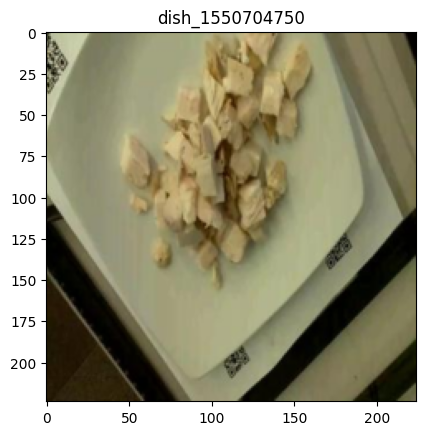

In [6]:
# convert the image tensor into numpy
image_np = image_tensor.numpy()
image_np = np.transpose(image_np, (1,2,0))

#plot the image
plt.imshow(image_np.squeeze())
plt.title(classes[label])
plt.show()

In [7]:
df = pd.read_csv("/home/ritushwar/Nutritional-Assistance/metadata/dish_meta_data.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4571 entries, 0 to 4570
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              4571 non-null   object 
 1   total_calories  4571 non-null   float64
 2   total_mass      4571 non-null   float64
 3   total_fat       4571 non-null   float64
 4   total_carb      4571 non-null   float64
 5   total_protein   4571 non-null   float64
 6   label           4571 non-null   object 
dtypes: float64(5), object(2)
memory usage: 250.1+ KB
None


id  total_calories  total_mass  total_fat  total_carb  \
0  dish_1561662216      300.794281       193.0  12.387489   28.218290   
1  dish_1562688426      137.569992        88.0   8.256000    5.190000   
2  dish_1561662054      419.438782       292.0  23.838249   26.351543   
3  dish_1562008979      382.936646       290.0  22.224644   10.173570   
4  dish_1560455030       20.590000       103.0   0.148000    4.625000   

   total_protein                                              label  
0      18.633970  [np.str_('mixed greens'), np.str_('brown rice'...  
1      10.297000  [np.str_('chicken apple sausage'), np.str_('ro...  
2      25.910593  [np.str_('mixed greens'), np.str_('pork'), np....  
3      35.345387  [np.str_('wheat berry'), np.str_('caesar salad...  
4       0.956000  [np.str_('cherry tomatoes'), np.str_('cucumber...

In [8]:
def get_data_from_id(dish_id):
    row_data = df.loc[df['id']== dish_id]
    row_dict = row_data.to_dict(orient='records')[0]
    cleaned_text = []
    for part in row_dict['label'].split("np.str_("):
        if "'" in part:
            text = part.split("'")[1]
            cleaned_text.append(text)

    row_dict['label'] = cleaned_text
    return row_dict

In [9]:
dish_id = classes[label]
row_dict = get_data_from_id(dish_id)
print(row_dict)

{'id': 'dish_1550704750', 'total_calories': 136.949997, 'total_mass': 83.0, 'total_fat': 2.988, 'total_carb': 0.0, 'total_protein': 25.73, 'label': ['chicken']}


In [10]:
def show_meta_info(dish_id):
    meta_data = get_data_from_id(dish_id)
    print(f"{dish_id}")
    print(f"Calorie: {meta_data['total_calories']}, Mass: {meta_data['total_mass']}, Fat: {meta_data['total_fat']}")
    print(f"Carb: {meta_data['total_carb']}, Protein: {meta_data['total_protein']}, Label: {meta_data['label']}")

In [11]:
def display_one_image(image):
    image_tensor, label = image
    image_np = image_tensor.numpy()

    image_np = np.transpose(image_np, (1,2,0))
    fig, axes = plt.subplots(figsize=(5,4))
    dish_id = classes[label]
    show_meta_info(dish_id)
    axes.imshow(image_np)
    plt.title(dish_id)
    axes.axis('off')

dish_1550704750
Calorie: 136.949997, Mass: 83.0, Fat: 2.988
Carb: 0.0, Protein: 25.73, Label: ['chicken']


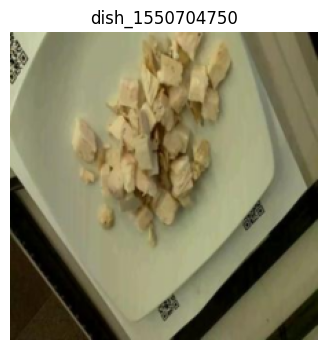

In [12]:
display_one_image(data_tensor[0])

In [13]:
def show_image(dataset, num_images=15):
    dataloader = DataLoader(dataset, batch_size=num_images, shuffle=True)
    images, labels = next(iter(dataloader))
    print(images.shape)

    #create a figure and image grid
    fig = plt.figure(figsize=(12,10))
    grid = ImageGrid(fig, 111, nrows_ncols=(3,5), axes_pad = 0.3, share_all=True)

    for i in range(num_images):
        grid[i].imshow(np.clip(images.numpy()[i].transpose(1,2,0),0,1))
        grid[i].axis('off')
        dish_id = classes[labels[i]]
        grid[i].set_title(dish_id)

    plt.show()

torch.Size([15, 3, 224, 224])


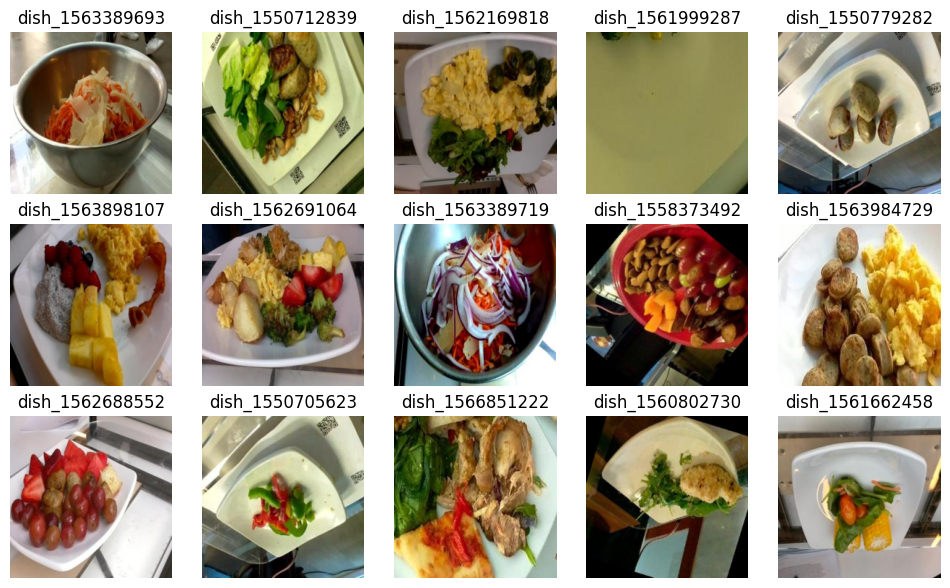

In [14]:
show_image(data_tensor)

In [15]:
from torchvision.utils import make_grid
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(20,10))
        ax.set_xticks([])         # remove the x-axis and y-axis tick mark
        ax.set_yticks([])
        # no of images per row is 10 
        ax.imshow(make_grid(images, nrow=16).permute(1,2,0)) # convert image tensor to (height, width, channel)
        break

In [17]:
batch_size = 128
data_iterable = DataLoader(data_tensor, batch_size=batch_size, shuffle=True)

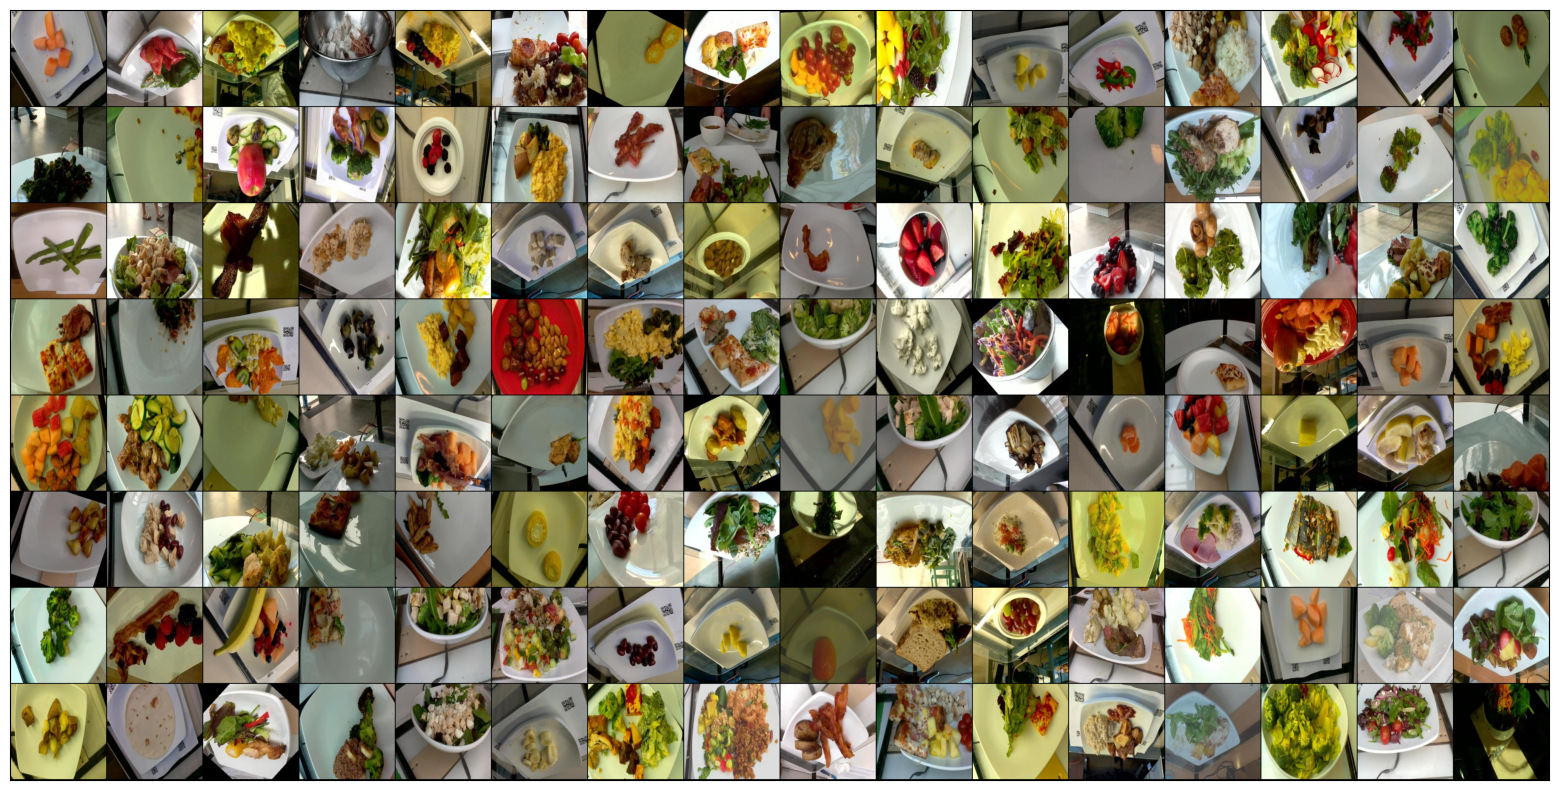

In [18]:
show_batch(data_iterable)